In [ ]:
#!pip install shap

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# -- stuff --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile


from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split   #- partition train/test split
from sklearn.tree import DecisionTreeClassifier        #- create a decison tree
from sklearn.ensemble import RandomForestClassifier    #- random forest classifier
from sklearn.ensemble import GradientBoostingClassifier #- GBM classfier
from sklearn.neural_network import MLPClassifier       #- multi-layer perceptron

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# -- shapley --
import shap

In [ ]:
# Unzip the file
with zipfile.ZipFile('/content/project_2_training.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('')

# Load the dataset
df = pd.read_csv('project_2_training.csv').sample(2000).reset_index(drop=True) # sample it to speed things up!
df['EVENT_LABEL'] = df['EVENT_LABEL'].map({'fraud': 1, 'legit': 0})
# Display the first few rows of the dataframe

df.head()

,EVENT_ID,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,...,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,2397160,3885.0,2657.0,63.0,4088.0,220.19.0.70,Mozilla/5.0 (Windows NT 5.01; os-RU; rv:1.9.2.20) Gecko/2017-12-16 14:54:03 Firefox/3.6.9,howell-taylor.com,+1-457-634-2224x6368,East Johnville,...,U,2021-04-08 09:31:47,Morgan Castro,39072 Austin Walk,448-36-2159,cv_RU,Q,6.0,13823.0,0
1,5400,6158.0,2945.0,55.0,5767.0,161.129.112.48,"Mozilla/5.0 (iPad; CPU iPad OS 7_1_2 like Mac OS X) AppleWebKit/533.0 (KHTML, like Gecko) CriOS/56.0.810.0 Mobile/74C959 Safari/533.0",lambert.com,646.736.9943x1137,Kingville,...,W,2021-07-21 10:04:27,Randy Ortega,2026 Sean Isle,527-10-6494,hy_AM,U,52.0,2815.0,0
2,2366660,5585.0,4288.0,79.0,5562.0,5.103.245.102,"Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10 10_9 rv:2.0; gv-GB) AppleWebKit/534.6.4 (KHTML, like Gecko) Version/4.1 Safari/534.6.4",daugherty.biz,(028)001-6204x8981,East Davidfurt,...,D,2021-05-20 06:56:53,Timothy Freeman,40422 Koch Neck,147-01-9780,gd_GB,W,9.0,4878.0,0
3,517760,4507.0,3445.0,72.0,7118.0,75.178.18.38,Mozilla/5.0 (Android 2.2.3; Mobile; rv:37.0) Gecko/37.0 Firefox/37.0,curry.org,(602)427-5138x12372,Vegastad,...,W,2020-11-15 14:52:55,Robert Schmidt,434 Mclaughlin Junctions,546-59-4808,hr_HR,N,47.0,14354.0,0
4,1010060,4855.0,2083.0,42.0,3214.0,86.35.192.206,"Mozilla/5.0 (Windows NT 5.2) AppleWebKit/533.2 (KHTML, like Gecko) Chrome/25.0.846.0 Safari/533.2",nelson-adams.com,089.221.9784x09379,Port Alexanderton,...,G,2020-11-14 10:45:33,Harold Ward,8758 Ramos Islands,431-11-0386,raj_IN,M,54.0,8542.0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test
train_data, test_data,  = train_test_split(df, test_size=0.3, random_state=42)
print(f"X_train: {train_data.shape}")
print(f"X_test: {test_data.shape}")


X_train: (7000, 27)
X_test: (3000, 27)


In [ ]:
# 1. Split features into categorical and numeric
target = 'EVENT_LABEL'

numeric_features = ['account_age_days', 'transaction_amt', 'transaction_adj_amt', 'historic_velocity']

categorical_features = ['billing_state', 'tranaction_initiate']

feature_names = numeric_features + categorical_features


In [ ]:
rf = RandomForestClassifier()
rf.fit(train_data[numeric_features],train_data[target])

RandomForestClassifier()

In [ ]:
from xgboost import XGBClassifier

# train XGBoost model
X = train_data[numeric_features]
y = train_data[target]
model = XGBClassifier().fit(X, y)

In [ ]:
# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

 99%|===================| 9857/10000 [00:20<00:00]       

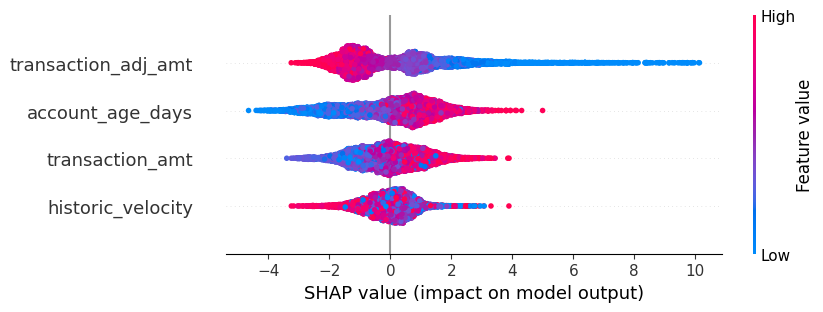

In [ ]:
shap.plots.beeswarm(shap_values)

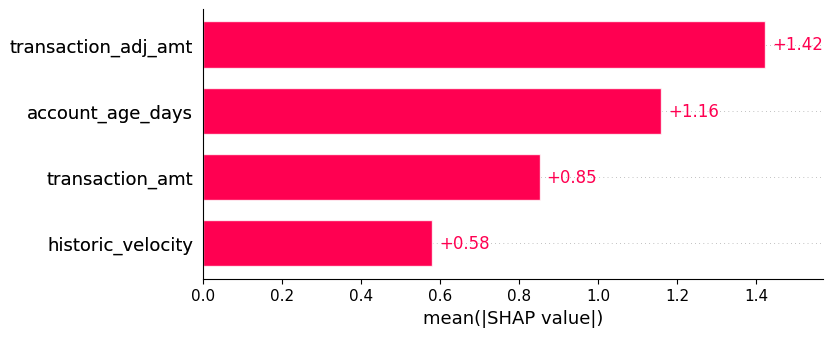

In [ ]:
shap.plots.bar(shap_values)

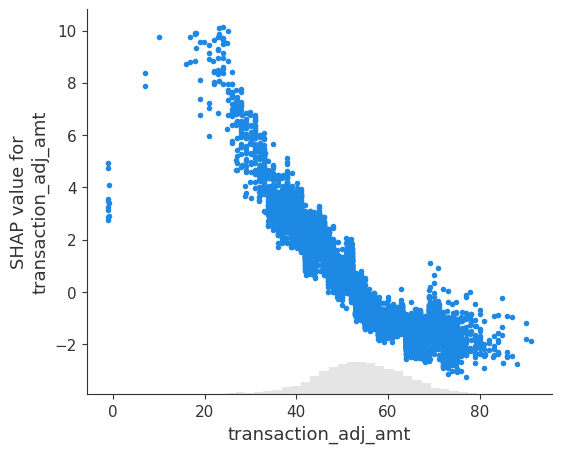

In [ ]:
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-1]])


In [ ]:
df['prob'] = model.predict_proba(X[numeric_features])[:,1]
df.sort_values('prob',ascending=False)

,EVENT_ID,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,...,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL,.pred,prob
5853,1633720,5852.0,3371.0,24.0,4101.0,136.249.198.52,Opera/9.42.(X11; Linux i686; he-IL) Presto/2.9.163 Version/10.00,west-glover.com,765-821-5865x8738,Port Duaneberg,...,Christopher Jenkins,19694 Boyle Courts,198-96-3504,fr_CA,G,20.0,9373.0,1,1.00,0.999843
2643,2710280,5198.0,2696.0,22.0,3420.0,98.203.34.54,"Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like Mac OS X) AppleWebKit/532.1 (KHTML, like Gecko) FxiOS/12.9k7412.0 Mobile/18S909 Safari/532.1",foster-marshall.org,+1-803-490-3609x103,Laurieborough,...,Marc Faulkner,84530 Spears Field Apt. 879,218-37-5289,am_ET,V,11.0,8552.0,1,0.99,0.999690
4877,1658440,6016.0,2753.0,24.0,3694.0,103.69.219.130,"Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10 8_9 rv:3.0; st-ZA) AppleWebKit/532.33.1 (KHTML, like Gecko) Version/4.1 Safari/532.33.1",galvan.com,701-160-4850,West Danielborough,...,Michael Brooks,895 Amy Stravenue,658-94-7345,bg_BG,Y,63.0,4980.0,1,1.00,0.999580
223,1023360,5177.0,2812.0,23.0,3745.0,221.196.184.216,Opera/9.31.(Windows 98; mt-MT) Presto/2.9.172 Version/10.00,mathews-heath.org,+1-035-779-9031x07292,Kirkchester,...,Eric Taylor,678 Christian Brooks,214-31-7975,wo_SN,R,18.0,6505.0,1,0.97,0.999537
1661,137820,6243.0,2740.0,23.0,3024.0,53.163.72.109,Mozilla/5.0 (Macintosh; PPC Mac OS X 10 10_1; rv:1.9.3.20) Gecko/2019-06-05 18:13:41 Firefox/3.8,scott-chang.com,916.123.8147,New Rachelmouth,...,Levi Sharp,821 Michael Wall Suite 994,610-99-7960,mhr_RU,D,27.0,12443.0,1,1.00,0.999533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,2805340,4477.0,2163.0,64.0,2682.0,44.169.98.253,"Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like Mac OS X; lb-LU) AppleWebKit/531.44.5 (KHTML, like Gecko) Version/4.0.5 Mobile/8B119 Safari/6531.44.5",andrews.info,(335)537-5160,Adrianafort,...,Cameron Gonzalez,2986 Manuel Club,408-06-9820,wo_SN,L,84.0,5799.0,0,0.00,0.000006
8581,2498440,2553.0,2564.0,55.0,5326.0,30.67.102.193,Mozilla/5.0 (Windows NT 5.1; uz-UZ; rv:1.9.1.20) Gecko/2021-01-10 23:18:50 Firefox/15.0,townsend-price.com,(266)462-8511x8243,Franklinfort,...,Angelica Kelly,95797 Dustin Extensions,603-21-0074,id_ID,P,85.0,11350.0,0,0.00,0.000006
974,1130500,3627.0,1848.0,58.0,2607.0,195.4.186.36,"Mozilla/5.0 (iPod; U; CPU iPhone OS 4_0 like Mac OS X; tg-TJ) AppleWebKit/535.47.6 (KHTML, like Gecko) Version/4.0.5 Mobile/8B112 Safari/6535.47.6",heath-ward.com,141.488.8285,North Denise,...,Autumn Dyer,890 Thompson Expressway Apt. 021,262-57-7081,quz_PE,F,58.0,6252.0,0,0.00,0.000006
7628,2400160,2533.0,2282.0,60.0,2747.0,212.151.70.41,"Mozilla/5.0 (Windows; U; Windows CE) AppleWebKit/535.30.3 (KHTML, like Gecko) Version/5.1 Safari/535.30.3",ross.biz,216-574-4804x334,Brandonshire,...,Javier Ferrell,700 Christina Mountains,762-94-8068,ts_ZA,P,61.0,3008.0,0,0.00,0.000005


In [ ]:
df.iloc[5853]['prob']

0.99984336

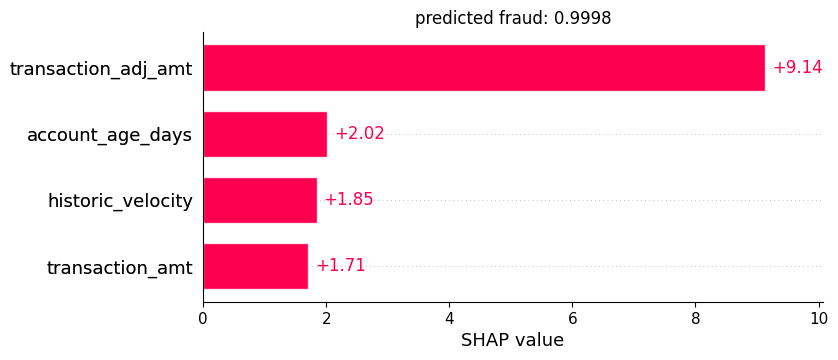

In [ ]:

plt.title(f"predicted fraud: {df.iloc[5853]['prob']:.4f}")
shap.plots.bar(shap_values[5853])
plt.show()

In [ ]:
top_5 = df.sort_values('prob',ascending=False).head(5).index.tolist()

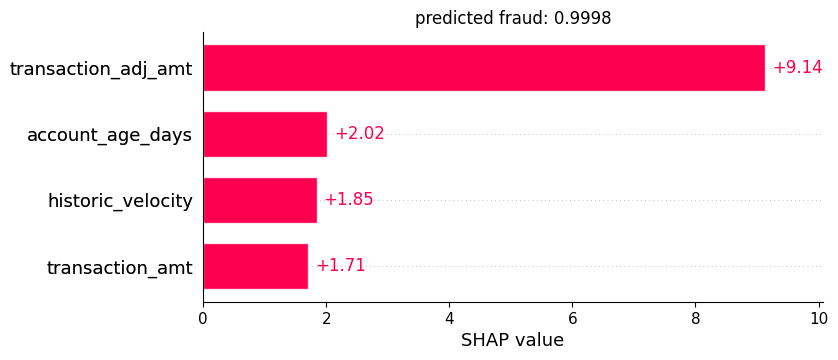

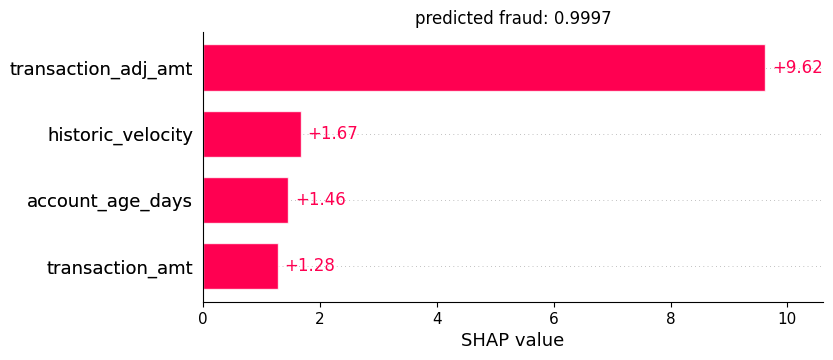

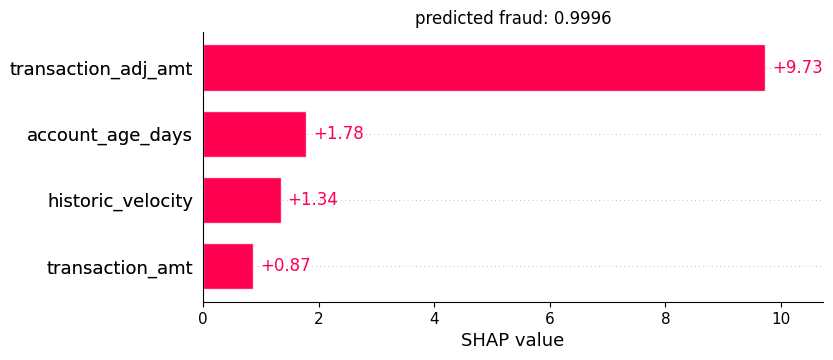

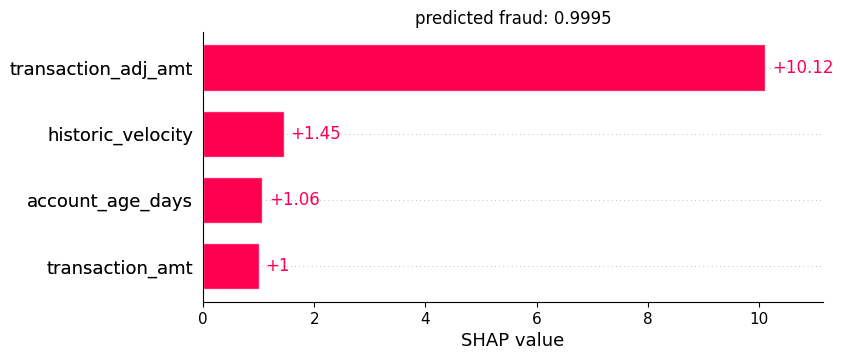

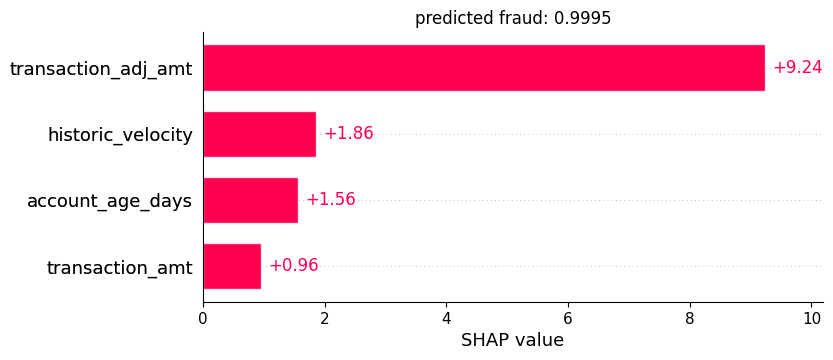

In [ ]:
for i in top_5:
  plt.title(f"predicted fraud: {df.iloc[i]['prob']:.4f}")
  shap.plots.bar(shap_values[i])
  plt.show()



In [ ]:
import shap

# Initialize the Tree explainer for the random forest model
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for the numeric features
shap_values = explainer.shap_values(df[numeric_features])

# For binary classification, shap_values will be a list with two arrays: [shap_values_class_0, shap_values_class_1]
# You typically want the SHAP values for the positive class, which is usually shap_values[1] for binary classification


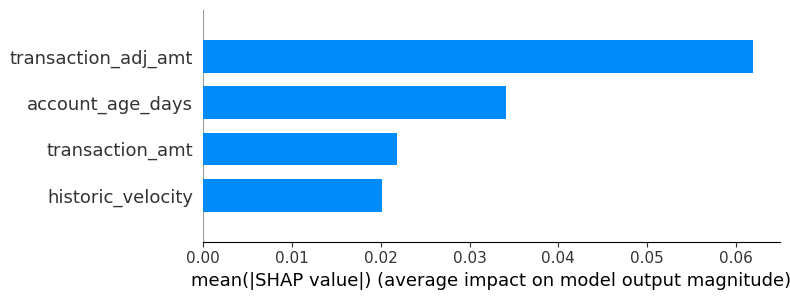

In [ ]:
# Summary plot for the SHAP values of the positive class
# Adjust shap_values index according to your specific classification problem
shap.summary_plot(shap_values[1], df[numeric_features], plot_type="bar")


## Shap Feature Importance

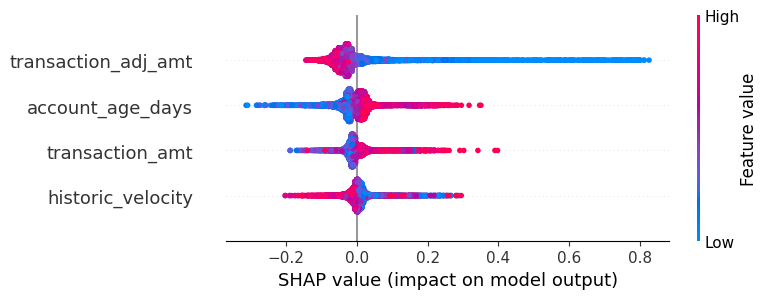

In [ ]:
shap.summary_plot(shap_values[1], df[numeric_features])


## Shap Partial Dependance PLOT

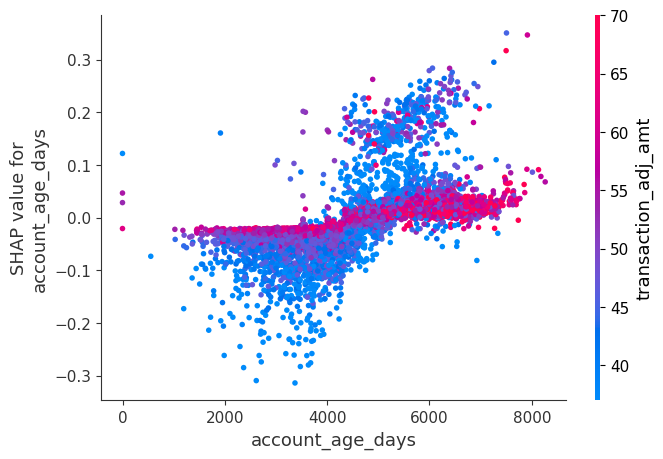

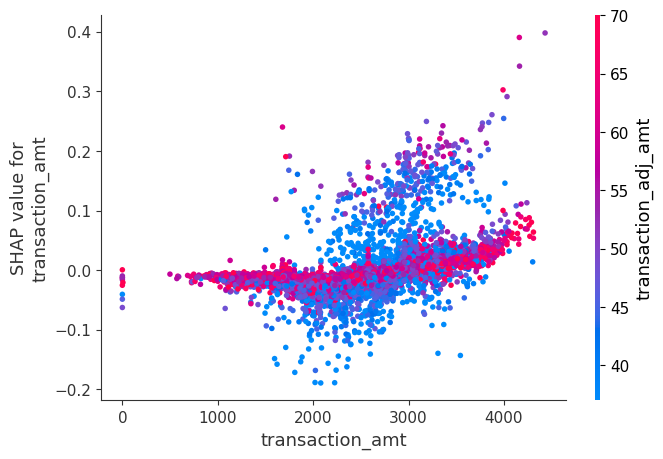

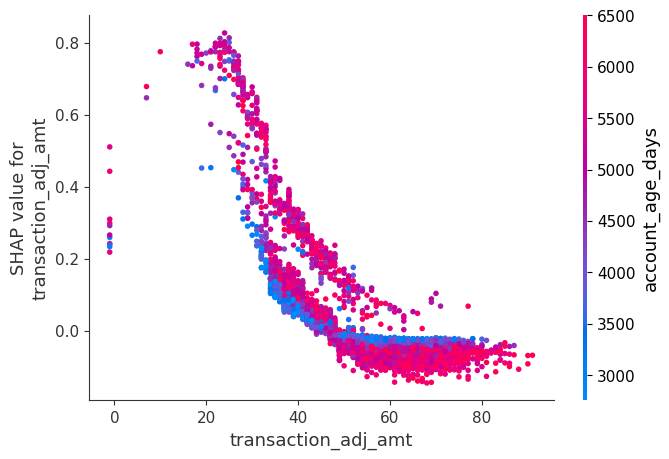

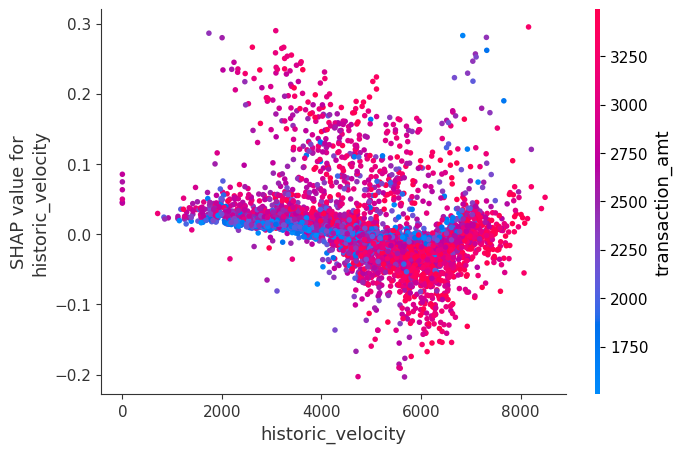

In [ ]:

# Loop through each numeric feature and create a SHAP dependence plot
for name in df[numeric_features].columns:
    shap.dependence_plot(
        name,
        shap_values[1],  # Use the SHAP values for the class of interest
        df[numeric_features],  # Original features DataFrame
        display_features=df[numeric_features]  # Original features for display
    )


# Step 1: Make Predictions and Identify True Positives
First, make predictions with your model and identify the top true positive cases based on their predicted probabilities.

In [ ]:
import numpy as np

# Make predictions
predictions = rf.predict(df[numeric_features])
probabilities = rf.predict_proba(df[numeric_features])[:, 1]  # Assuming class '1' is the positive class

# Identify actual positives in the dataset
actual_positives = df[target] == 1

# Identify true positives
true_positives = (predictions == 1) & actual_positives

# Get the top 5 true positives based on predicted probabilities
top_5_indices = np.argsort(probabilities[true_positives])[-5:]


array([415, 111, 514, 200, 322])

## Step 2: Calculate SHAP Values for the Top 5 TP Predictions
Calculate the SHAP values for these top 5 TP instances to understand the model's decision-making process for these specific predictions.

In [ ]:
# Initialize the SHAP Tree explainer
explainer = shap.TreeExplainer(rf)

# compute SHAP values
explainer = shap.Explainer(rf, df[numeric_features])
shap_values = explainer(df[numeric_features])

# Calculate SHAP values for the top 5 TP instances
top_5_tp_shap_values = explainer.shap_values(df[numeric_features].iloc[top_5_indices])


100%|===================| 19941/20000 [03:09<00:00]       

## Step 3: Visualize SHAP Values for Each of the Top 5 TP Predictions

Top TP Prediction 1, Original DataFrame Index: 415


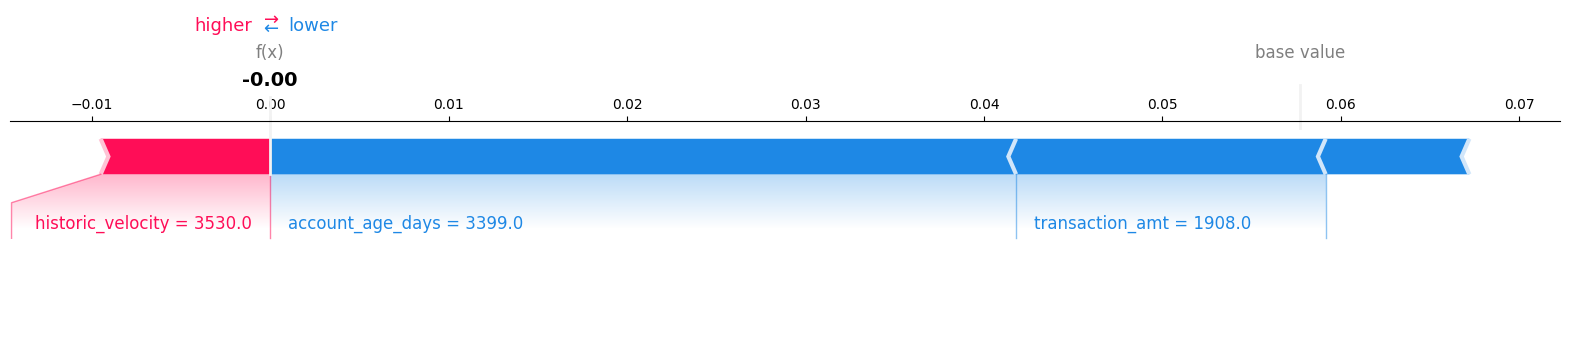

Top TP Prediction 2, Original DataFrame Index: 111


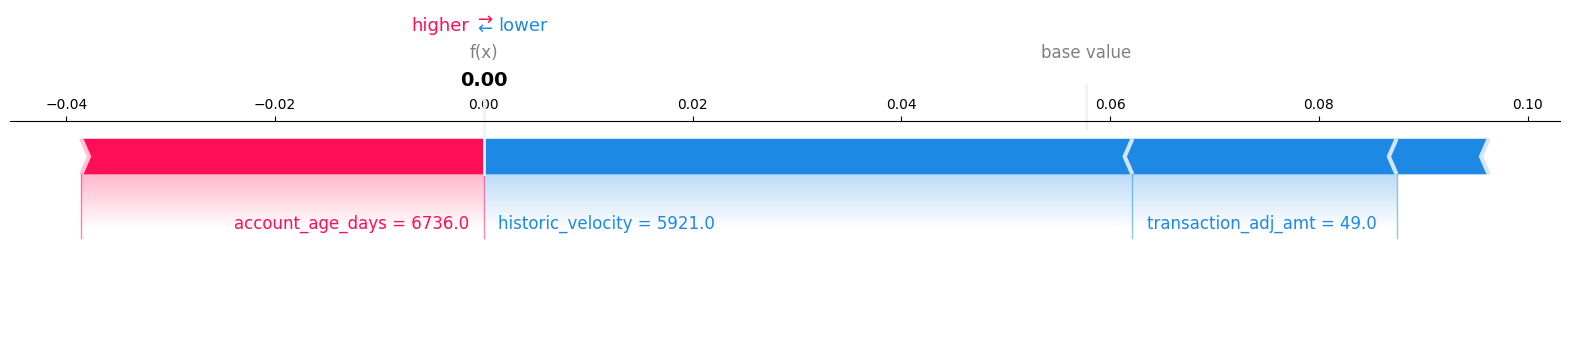

Top TP Prediction 3, Original DataFrame Index: 514


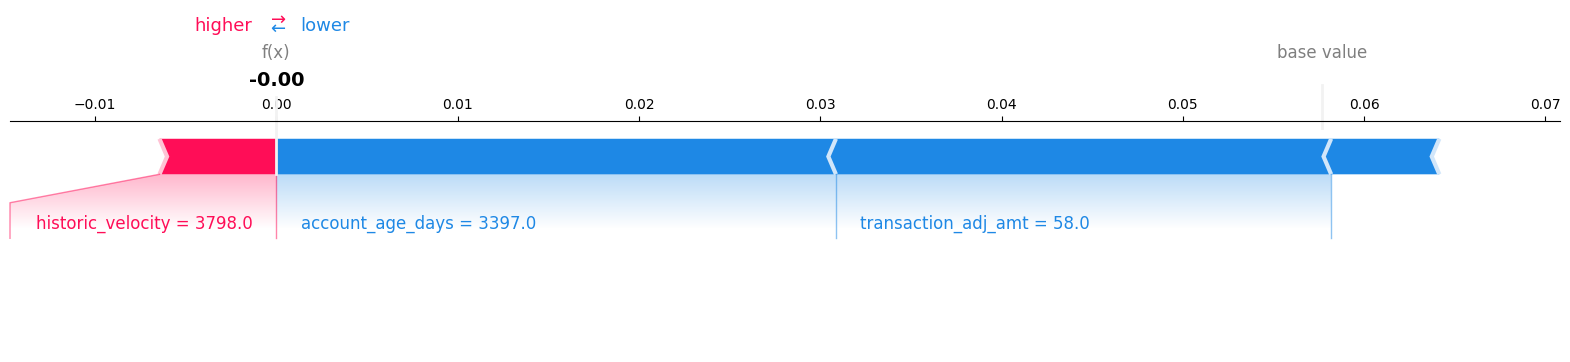

Top TP Prediction 4, Original DataFrame Index: 200


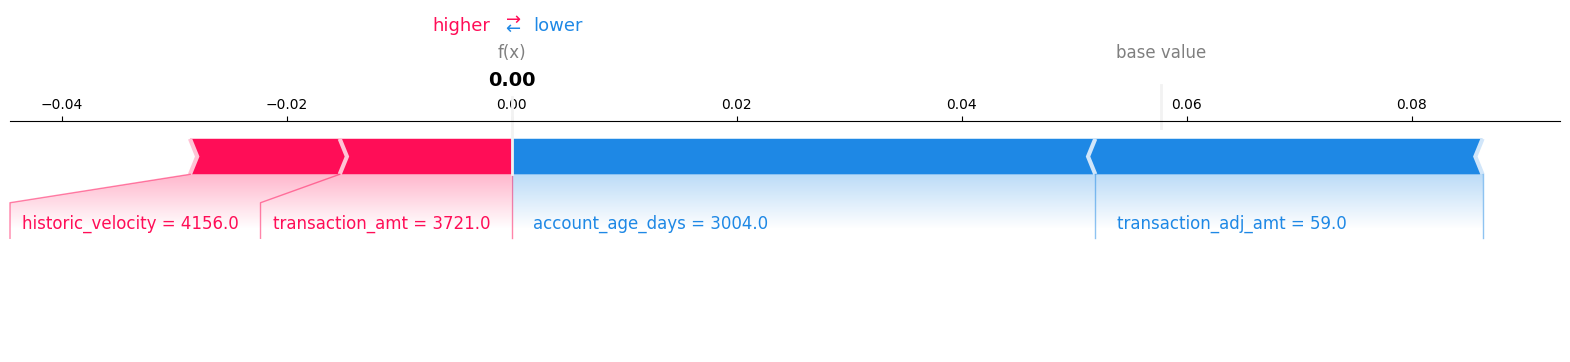

Top TP Prediction 5, Original DataFrame Index: 322


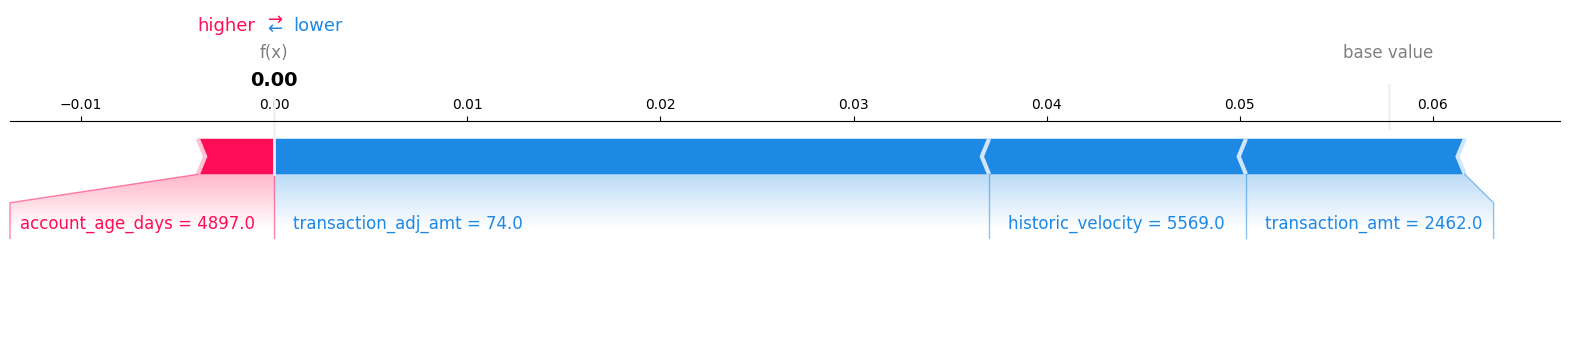

In [ ]:
# Assuming `top_5_tp_shap_values` is correctly calculated for the top 5 TP instances
# Note: Ensure you are using the correct expected_value for your model's output. This example assumes binary classification.

for i in range(len(top_5_indices)):
    # No need to use 'index' to access SHAP values; use 'i' directly as we're iterating over a list of size 5
    print(f"Top TP Prediction {i+1}, Original DataFrame Index: {top_5_indices[i]}")

    # Correcting SHAP value access; using 'i' ensures we're referencing the correct SHAP values slice
    shap.force_plot(
        explainer.expected_value[1],
        top_5_tp_shap_values[1][i],  # Access by relative position
        df.iloc[top_5_indices[i]][numeric_features],  # Use the original DataFrame index to get feature values
        matplotlib=True
    )
    plt.show()





In [ ]:
df['.pred'] = rf.predict_proba(df[numeric_features])[:, 1]
df.nlargest(5,'.pred')

,EVENT_ID,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,...,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL,.pred
377,2785600,5908.0,3342.0,31.0,3295.0,111.242.109.46,Opera/8.47.(X11; Linux i686; wal-ET) Presto/2.9.170 Version/11.00,garcia.net,(307)450-7826x909,Angelachester,...,2021-07-31 01:19:30,Julie Smith,62554 Kelley Estate,288-14-1066,kw_GB,T,62.0,10964.0,1,1.0
1174,2676260,5238.0,2529.0,24.0,3336.0,143.121.228.31,"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/533.1 (KHTML, like Gecko) Chrome/30.0.853.0 Safari/533.1",bernard-schneider.com,(125)841-8796x4103,Sarahmouth,...,2021-06-26 00:49:54,Brandy Morton,91308 Davis Court,398-87-0021,eu_FR,S,87.0,13495.0,1,1.0
1404,30040,6239.0,2475.0,23.0,3032.0,10.179.180.77,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10 9_8; rv:1.9.4.20) Gecko/2010-09-01 08:16:35 Firefox/3.6.12,castro.com,+1-192-097-7902x19839,West Amyton,...,2021-05-17 02:51:36,Hannah Gibson,720 Eric Overpass Apt. 125,463-32-2369,sv_FI,N,100.0,4091.0,1,1.0
1661,137820,6243.0,2740.0,23.0,3024.0,53.163.72.109,Mozilla/5.0 (Macintosh; PPC Mac OS X 10 10_1; rv:1.9.3.20) Gecko/2019-06-05 18:13:41 Firefox/3.8,scott-chang.com,916.123.8147,New Rachelmouth,...,2021-03-29 13:24:15,Levi Sharp,821 Michael Wall Suite 994,610-99-7960,mhr_RU,D,27.0,12443.0,1,1.0
2225,2727840,5221.0,3586.0,28.0,3884.0,195.45.117.87,"Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like Mac OS X) AppleWebKit/534.2 (KHTML, like Gecko) FxiOS/14.6d3828.0 Mobile/20Y347 Safari/534.2",boyer-willis.com,+1-289-154-1661x182,Seanburgh,...,2021-01-30 01:33:34,Lauren May,7312 Meagan Skyway,140-24-3125,et_EE,X,89.0,6031.0,1,1.0
